In [8]:
import numpy
import shlex 
import streamlink

import subprocess as sp


from matplotlib import pyplot as plt

In [ ]:
FFMPEG_BIN = "ffmpeg"

argstring_Streamlink = r"streamlink --force --output C:\Users\simon\Desktop\foo.ts https://www.twitch.tv/lostaiming best"
argstring_FFMPEG = r"ffmpeg -i C:\Users\simon\Desktop\foo.ts -c:v copy -c:a copy -f mp4 -movflags faststart -y C:\Users\simon\Desktop\out.mp4"

args_Streamlink = shlex.split(argstring_Streamlink)
args_FFMPEG = shlex.split(argstring_FFMPEG)

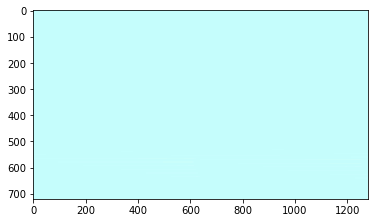

In [13]:
FFMPEG_BIN = "ffmpeg"

command = [ FFMPEG_BIN,
           '-i', r'C:\Users\simon\Desktop\video2.mp4',
           '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vcodec', 'rawvideo', '-']


pipe = sp.Popen(command, stdout = sp.PIPE, bufsize=1280*720*3)



raw_image = pipe.stdout.read(1280*720*3)
# transform the byte read into a numpy array
image =  numpy.fromstring(raw_image, dtype='uint8')

image = image.reshape((720,1280,3))

plt.imshow( image )
plt.show()

# throw away the data in the pipe's buffer.
pipe.stdout.flush()

In [21]:
streams = streamlink.streams("twitch.tv/papaplatte")
stream = streams["720p"]
fd = stream.open()
data = fd.read(1280*720*3)

In [13]:
argstring_Streamlink = r"streamlink --force --output C:\Users\simon\Desktop\joo.ts https://www.twitch.tv/kaffeekind best"
argstring_FFMPEG = r"ffmpeg -i C:\Users\simon\Desktop\joo.ts -r 1 -s 960x540 -f image2 C:\Users\simon\Desktop\bilder\foo-%03d.jpg"

pipe = sp.Popen(argstring_Streamlink, stdout = sp.PIPE)
print(pipe.communicate())
pipe.stdout.flush()

KeyboardInterrupt: 

In [11]:
pipe2 = sp.Popen(argstring_FFMPEG, stdout = sp.PIPE)

In [23]:
#raw_image = pipe.stdout.read(1280*720*3)
# transform the byte read into a numpy array
image =  numpy.fromstring(data, dtype='uint8')
print(image.size)
image = image.reshape((720,1280,3))

plt.imshow( image )
plt.show()

660256


ValueError: total size of new array must be unchanged

In [ ]:
ffmpeg take pipe as input : -i pipe:0

stramlink to take pipe as output:  -O --stdout

    streamlink -O --stdout https://www.twitch.tv/kaffeekind worst | ffmpeg -i pipe:0 -c:v copy -c:a copy -f mp4 -movflags faststart -y C:\Users\simon\Desktop\out.mp4

In [ ]:
# Write streamlink to file
# streamlink --force --output C:\Users\simon\Desktop\foo.ts https://www.twitch.tv/kaffeekind best

# convert file to mp4
# ffmpeg -i C:\Users\simon\Desktop\foo.ts -c:v copy -c:a copy -f mp4 -movflags faststart -y C:\Users\simon\Desktop\out.mp4


https://github.com/streamlink/streamlink/issues/1021